# Examples of plotting

## Standard line plot

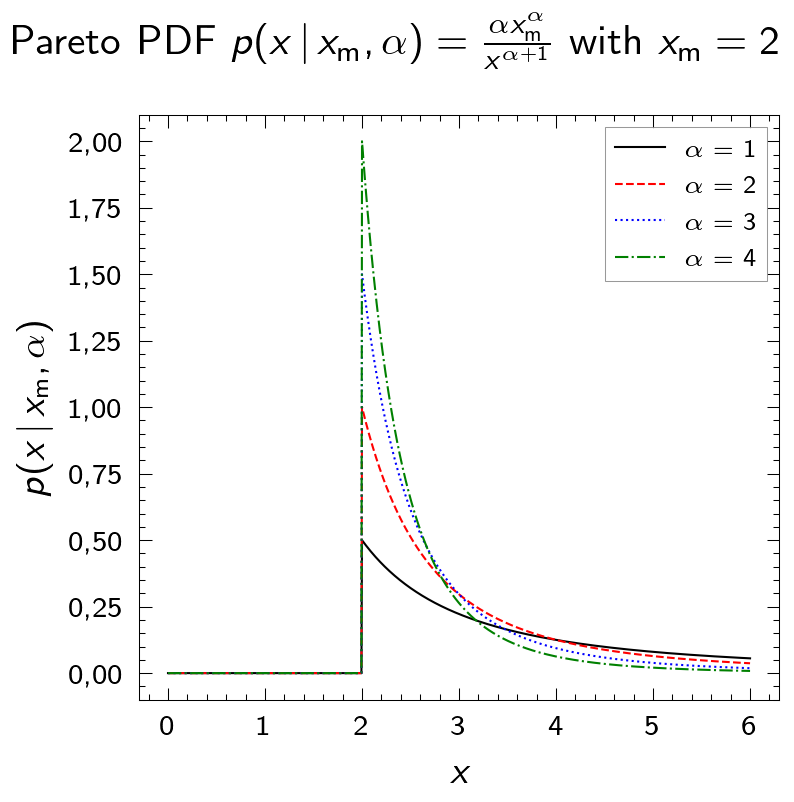

In [5]:
import numpy as np
from scipy.stats import pareto
import matplotlib.pyplot as plt

import sciplot


with sciplot.style():
    x_m = 2  # scale
    alpha_lst = [1, 2, 3, 4]  # shape parameters
    x = np.linspace(0, 6, 1000)

    pdf = np.array([pareto.pdf(x, scale=x_m, b=a) for a in alpha_lst])

    sciplot.set_size_cm(7)
    fig, ax = plt.subplots(1, 1)

    fig.suptitle(r'Pareto PDF' +
                 r' $p(x \,|\, x_\mathrm{m}, \alpha) = \frac{\alpha x_\mathrm{m}^\alpha}{x^{\alpha+1}}$' +
                 r' with $x_\mathrm{m}=2$')

    line_plot = ax.plot(x, pdf.T)

    label_lst = []
    for alpha in alpha_lst:
        label_lst.append(r'$\alpha=' + str(alpha) + '$')

    sciplot.set_legend(
        ax=ax,
        plot_tpl=line_plot,
        label_tpl=tuple(label_lst),
        loc='upper right'
    )

    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$p(x \,|\, x_\mathrm{m}, \alpha)$')

    plt.show()

## Dark themed histogram plot

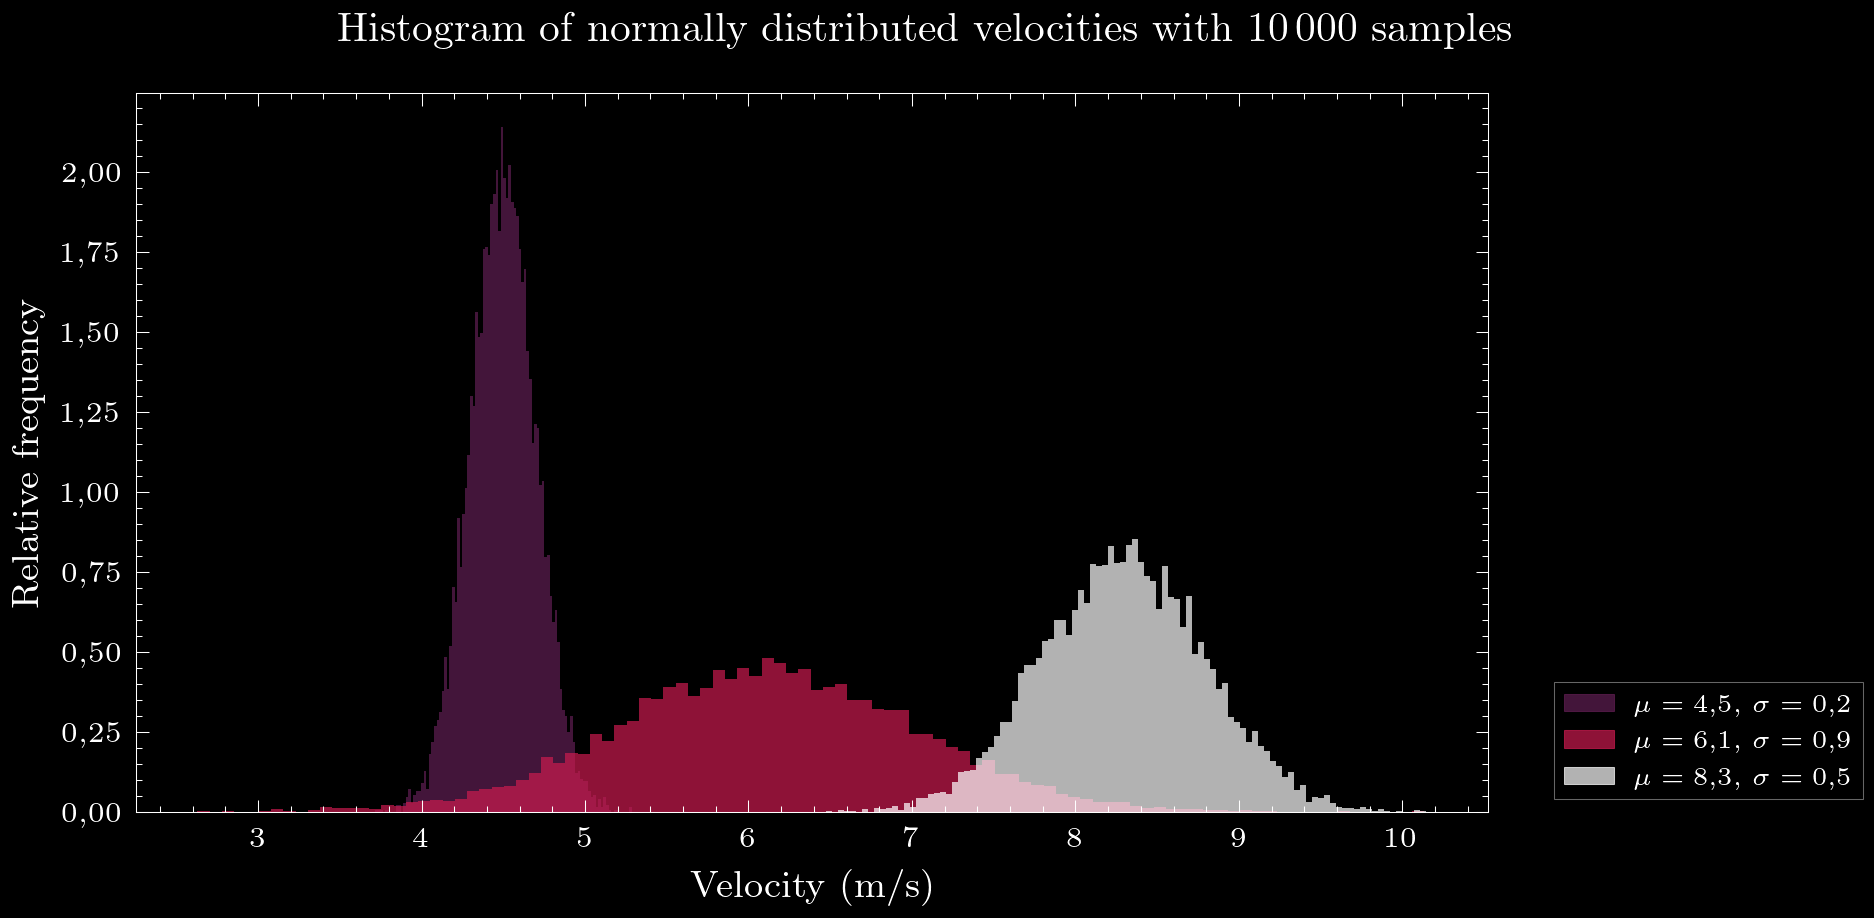

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import sciplot


with sciplot.style(theme='dark', font_style='serif'):
    np.random.seed(42)
    n = 10000
    mean_ar = np.array([4.5, 6.1, 8.3])
    std_ar = np.array([0.2, 0.9, 0.5])
    data_ar = np.array([
        np.random.normal(mean_ar[0], std_ar[0], n),
        np.random.normal(mean_ar[1], std_ar[1], n),
        np.random.normal(mean_ar[2], std_ar[2], n)
    ])

    sciplot.set_size_cm(16, 8)
    fig, ax = plt.subplots(1, 1)

    fig.suptitle('Histogram of normally distributed velocities with \SI{' + str(n) + '}{} samples')


    plot_lst = []
    color_lst = sciplot.get_color_lst(len(data_ar), seaborn_color_map='rocket', colorful=False)

    for i, data in enumerate(data_ar):
        ax.hist(data, density=True, bins=100, alpha=0.7, color=color_lst[i])
        plot_lst.append(Rectangle((0, 0), 1, 1, color=color_lst[i], alpha=0.7))

    label_lst = []
    for i in range(len(data_ar)):
        label_lst.append(r'$\mu=\SI{' + str(mean_ar[i]) + '}{}$, $\sigma=\SI{' + str(std_ar[i]) + '}{}$')

    sciplot.set_legend(
        ax=ax,
        plot_tpl=tuple(plot_lst),
        label_tpl=tuple(label_lst),
        loc='lower right',
        outside_plot=True
    )

    ax.set_xlabel('Velocity (\si{\metre\per\second})')
    ax.set_ylabel(r'Relative frequency')

    plt.show()
